In [415]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date
import yfinance as yf
from pandas_datareader import data as pdr
import numpy_financial as nf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [416]:
scrapes_raw = pd.read_csv('/Users/RDeWitt/Desktop/NYSE_days_0-42.csv', parse_dates=[1], index_col=[1])
scrapes = scrapes_raw.fillna(0)
scrapes = scrapes.drop(scrapes.columns[0], axis = 1)
scrapes.head(5)

,AM,AMD,MD,PLTR,TR,TA,AA,AAP,AAPL,AP,...,LMND,RMO,RAD,NGS,COP,TTD,EARN,APPS,ABR,SABR
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-23,223,143,147,139,148,30,123,115,115,167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-26,361,127,203,143,155,14,90,83,83,133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-27,247,138,979,122,134,22,82,73,73,124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-28,492,359,692,99,109,27,146,136,134,216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-29,262,91,129,122,142,19,234,222,222,284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [417]:
scrape_subs = scrapes[['AMD','MVIS','AMC','PLTR','TSLA','GME','CE','AN']]
scrape_subs.head(5)

,AMD,MVIS,AMC,PLTR,TSLA,GME,CE,AN
Date,,,,,,,,
2021-04-23,143,622,39,139,107,305,28,40
2021-04-26,127,1653,126,143,186,559,36,26
2021-04-27,138,1386,66,122,142,472,30,54
2021-04-28,359,1106,71,99,129,231,37,37
2021-04-29,91,595,52,122,151,178,39,48


In [418]:
log_scrapes = np.log(scrape_subs)
log_scrapes.head(5)

,AMD,MVIS,AMC,PLTR,TSLA,GME,CE,AN
Date,,,,,,,,
2021-04-23,4.962845,6.432940,3.663562,4.934474,4.672829,5.720312,3.332205,3.688879
2021-04-26,4.844187,7.410347,4.836282,4.962845,5.225747,6.326149,3.583519,3.258097
2021-04-27,4.927254,7.234177,4.189655,4.804021,4.955827,6.156979,3.401197,3.988984
2021-04-28,5.883322,7.008505,4.262680,4.595120,4.859812,5.442418,3.610918,3.610918
2021-04-29,4.510860,6.388561,3.951244,4.804021,5.017280,5.181784,3.663562,3.871201


In [419]:
ticker1 = "AMD"
ticker2 = "MVIS"
ticker3 = "AMC"
ticker4 = "PLTR"
ticker5 = "TSLA"
ticker6 = "GME"
ticker7 = "CE"
ticker8 = "AN"
data = yf.download( 
        tickers = [ticker1, ticker2, ticker3, ticker4, ticker5, ticker6, ticker7, ticker8],
        period = "3y",
        interval = "1d")

[*********************100%***********************]  8 of 8 completed


In [420]:
data.tail()

Adj Close                                                 \
                  AMC        AMD          AN          CE         GME   
Date                                                                   
2021-05-28  26.120001  80.080002  102.129997  165.449997  222.000000   
2021-06-01  32.040001  80.809998  105.330002  168.429993  249.020004   
2021-06-02  62.549999  81.970001  102.529999  165.789993  282.239990   
2021-06-03  51.340000  80.279999  100.980003  167.119995  258.179993   
2021-06-04  49.724201  82.040100   98.220001  166.440002  252.210007   

                                                  Close             ...  \
                 MVIS       PLTR        TSLA        AMC        AMD  ...   
Date                                                                ...   
2021-05-28  15.600000  22.950001  625.219971  26.120001  80.080002  ...   
2021-06-01  17.950001  23.059999  623.900024  32.040001  80.809998  ...   
2021-06-02  19.049999  24.450001  605.119995  62.549999  81.970001  ...   
2021-06-03  18.020000  23.629999  572.840027  51.340000  80.279999  ...   
2021-06-04  20.440001  24.040001  597.820007  49.724201  82.040100  ...   

                 Open                 Volume                             \
                 PLTR        TSLA        AMC       AMD      AN       CE   
Date                                                                      
2021-05-28  23.000000  628.500000  660623600  40952700  745000   673600   
2021-06-01  23.190001  627.799988  508694600  43433000  682700  1093700   
2021-06-02  23.020000  620.130005  766462500  35203200  795100   498100   
2021-06-03  24.139999  601.799988  593313300  29779900  807200   546000   
2021-06-04  23.709999  579.710022  257000370  19492625  555537   238161   

                                                       
                 GME      MVIS         PLTR      TSLA  
Date                                                   
2021-05-28  11751400  28260000  111846000.0  22737000  
2021-06-01   9625600  20135700   52695500.0  18084900  
2021-06-02  16019200  30271600   86473200.0  23302800  
2021-06-03   7990600  12693200   48067100.0  30025400  
2021-06-04   2569708  36468665   33083259.0  19340119  

[5 rows x 48 columns]

In [421]:
#returns = data["Close"].pct_change().dropna() - .001
#print(returns)

In [422]:
log_returns = np.log(data['Close'] / data['Close'].shift(1))
log_returns.tail

<bound method NDFrame.tail of                  AMC       AMD        AN        CE       GME      MVIS  \
Date                                                                     
2018-06-04       NaN       NaN       NaN       NaN       NaN       NaN   
2018-06-05  0.013652  0.000000  0.013557 -0.003300  0.024967 -0.034368   
2018-06-06 -0.003396  0.053748  0.028621  0.025759 -0.012405  0.006969   
2018-06-07 -0.003407 -0.051058 -0.009656 -0.008000  0.004843 -0.006969   
2018-06-08 -0.013746  0.023890  0.013737  0.000683  0.002757 -0.095310   
...              ...       ...       ...       ...       ...       ...   
2021-05-28 -0.015198  0.020947 -0.007997  0.000363 -0.135169 -0.014636   
2021-06-01  0.204284  0.009075  0.030852  0.017851  0.114856  0.140319   
2021-06-02  0.668981  0.014253 -0.026943 -0.015798  0.125225  0.059477   
2021-06-03 -0.197496 -0.020833 -0.015233  0.007990 -0.089101 -0.055585   
2021-06-04 -0.031978  0.021688 -0.027713 -0.004077 -0.023395  0.126012   

       

In [423]:
# To annualize or not to annualize volatility
volatility = log_returns.rolling(window=252).std() * np.sqrt(252)

In [424]:
volatility.info()
volatility.head

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2018-06-04 to 2021-06-04
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMC     505 non-null    float64
 1   AMD     505 non-null    float64
 2   AN      505 non-null    float64
 3   CE      505 non-null    float64
 4   GME     505 non-null    float64
 5   MVIS    505 non-null    float64
 6   PLTR    0 non-null      float64
 7   TSLA    505 non-null    float64
dtypes: float64(8)
memory usage: 53.2 KB


<bound method NDFrame.head of                  AMC       AMD        AN        CE       GME      MVIS  PLTR  \
Date                                                                           
2018-06-04       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2018-06-05       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2018-06-06       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2018-06-07       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2018-06-08       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
...              ...       ...       ...       ...       ...       ...   ...   
2021-05-28  2.209156  0.478214  0.390758  0.309624  2.398252  1.650990   NaN   
2021-06-01  2.217827  0.478248  0.391642  0.309881  2.400294  1.654298   NaN   
2021-06-02  2.314100  0.478403  0.392711  0.308570  2.402761  1.654947   NaN   
2021-06-03  2.323094  0.478634  0.389549  0.306984  2.404683  1.656209   NaN   
2021-06-04

In [425]:
volatility = volatility['2021-04-23':'2021-06-02']

Text(0, 0.5, 'Annualized Volatility')

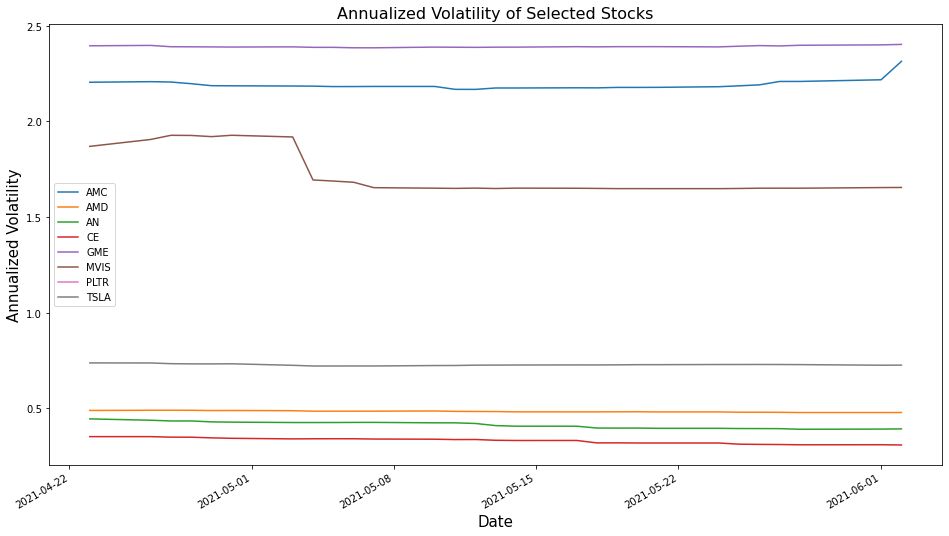

In [426]:
volatility.plot(figsize=(16,9))
plt.title(u'Annualized Volatility of Selected Stocks', size=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Annualized Volatility', fontsize=15)

In [427]:
volume = data['Volume']
volume = volume['2021-04-23':'2021-06-02']
log_volume = np.log(volume)

Text(0, 0.5, 'Log Scale')

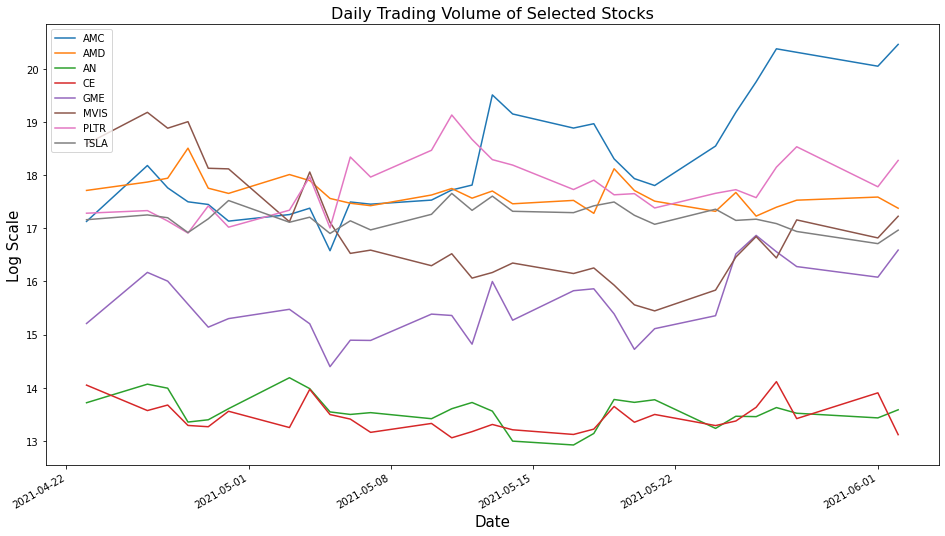

In [428]:
log_volume.plot(figsize=(16,9))
plt.title(u'Daily Trading Volume of Selected Stocks', size=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Log Scale', fontsize=15)

Text(0, 0.5, 'Number of Mentions')

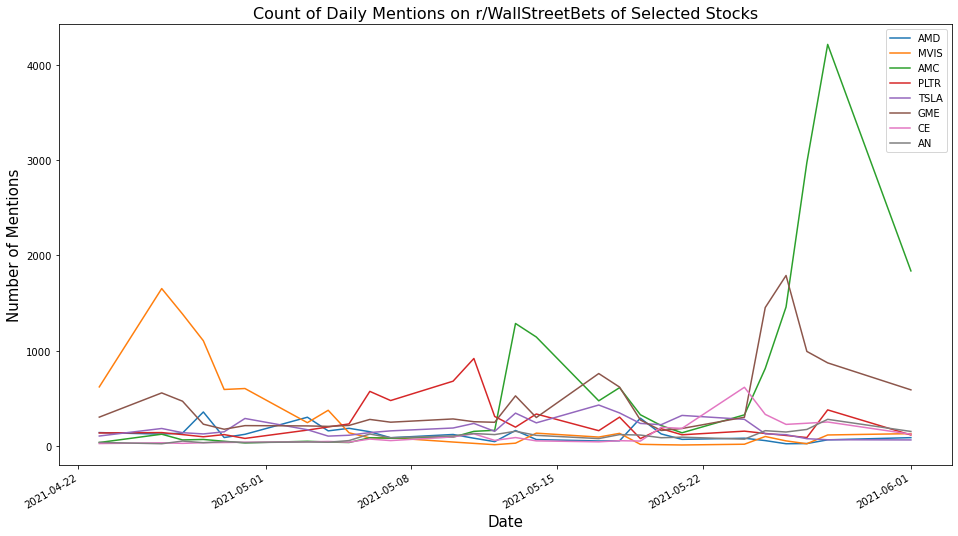

In [429]:
scrape_subs.plot(figsize=(16,9))
plt.title(u'Count of Daily Mentions on r/WallStreetBets of Selected Stocks', size=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Mentions', fontsize=15)

Text(0, 0.5, 'Log Scale')

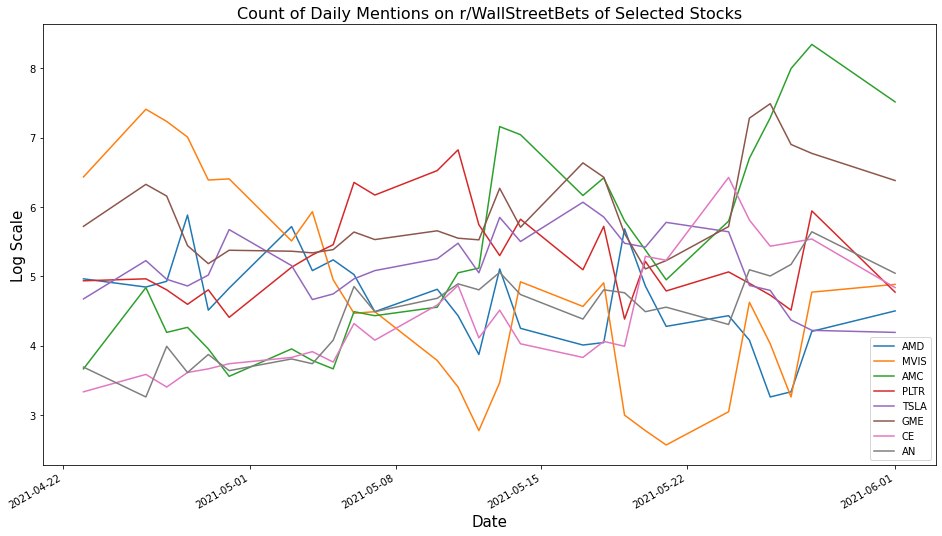

In [430]:
log_scrapes.plot(figsize=(16,9))
plt.title(u'Count of Daily Mentions on r/WallStreetBets of Selected Stocks', size=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Log Scale', fontsize=15)

In [431]:
corr_volume = pd.merge(scrapes, volume, how='inner', left_index=True, right_index=True)
corr_volatility = pd.merge(scrapes,volatility, how='inner', left_index=True, right_index=True)

In [432]:
def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1)
    return df

# MVIS Analysis

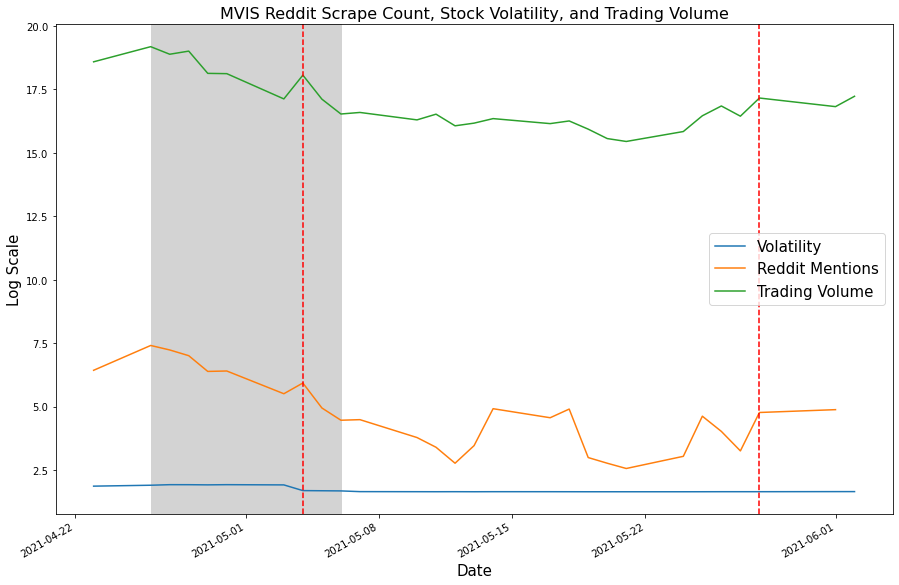

In [433]:
fig, ax = plt.subplots(figsize=(15,10))
volatility['MVIS'].plot(x="Date", y="Amount", ax=ax, label='Volatility')
log_scrapes['MVIS'].plot(x="Date", y="Amount", ax=ax, label='Reddit Mentions')
log_volume['MVIS'].plot(x="Date", y="Amount", ax=ax, label='Trading Volume')
plt.title(u'MVIS Reddit Scrape Count, Stock Volatility, and Trading Volume', size=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Log Scale', fontsize=15)
plt.axvspan(dt.datetime(2021, 4, 26), dt.datetime(2021, 5, 6), color='lightgray')
plt.axvline(dt.datetime(2021, 5, 4), color='r', linestyle='--')
plt.axvline(dt.datetime(2021, 5, 28), color='r', linestyle='--')
plt.legend(prop={'size': 15}, loc='center right')

In [434]:
scipy.stats.pearsonr(corr_volume['MVIS_x'], corr_volume['MVIS_y'])

(0.9783689370227435, 1.2581242483235456e-18)

In [435]:
MVIS_volume = corr_volume[['MVIS_x','MVIS_y']]
MVIS_volume = MVIS_volume.rename(columns = {'MVIS_x':'MVIS_ScrapeCount', 'MVIS_y':'MVIS_Volume'})
#MVIS_volume.head()

In [436]:
NON_DER = ['Date',]
df_new = df_derived_by_shift(MVIS_volume, 3, NON_DER)
#df_new.head(10)

In [437]:
#df_new.corr()

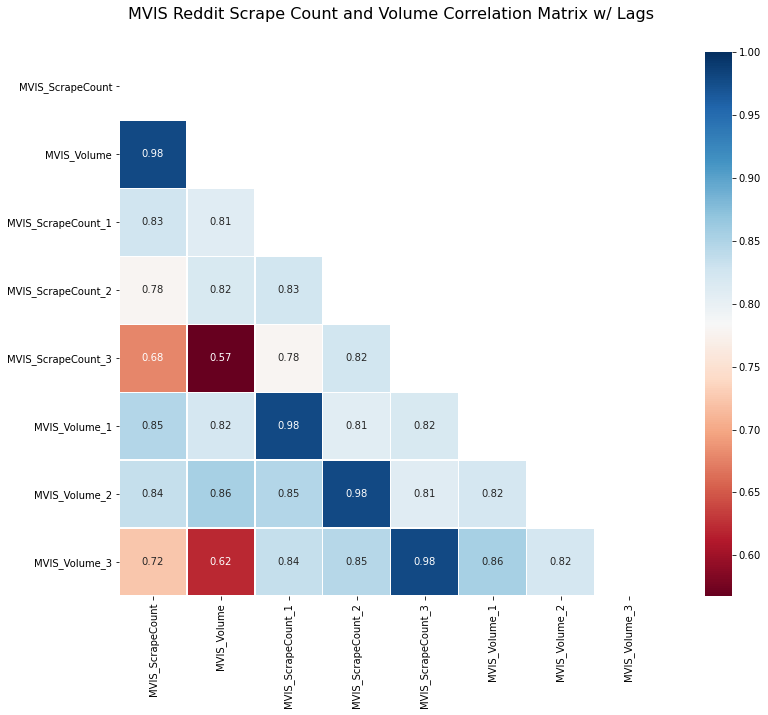

In [438]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'MVIS Reddit Scrape Count and Volume Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [439]:
scipy.stats.pearsonr(corr_volatility['MVIS_x'], corr_volatility['MVIS_y'])

(0.8264233131453875, 1.0911756076951101e-07)

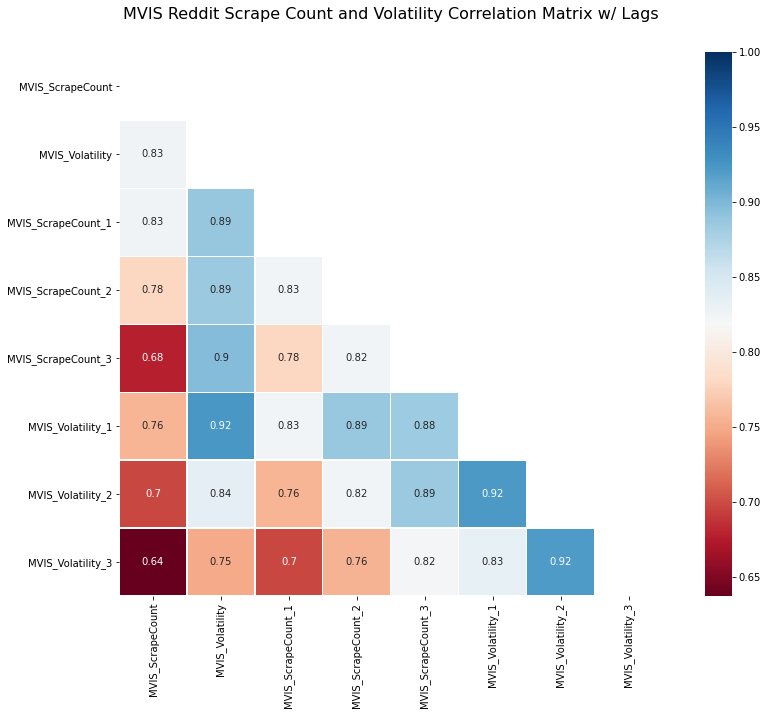

In [440]:
MVIS_volatility = corr_volatility[['MVIS_x','MVIS_y']]
MVIS_volatility = MVIS_volatility.rename(columns = {'MVIS_x':'MVIS_ScrapeCount', 'MVIS_y':'MVIS_Volatility'})

NON_DER = ['Date',]
df = df_derived_by_shift(MVIS_volatility, 3, NON_DER)

colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'MVIS Reddit Scrape Count and Volatility Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# AMC Analysis

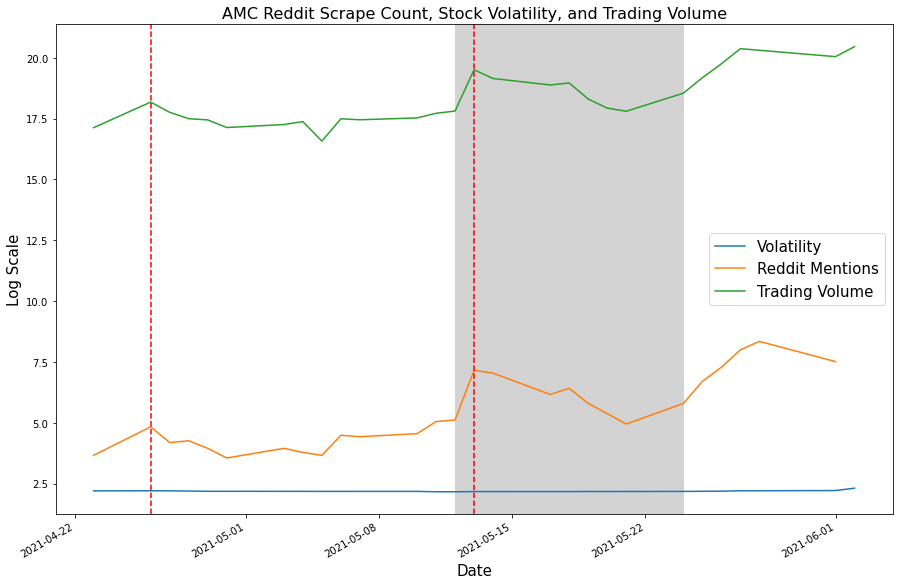

In [441]:
fig, ax = plt.subplots(figsize=(15,10))
volatility['AMC'].plot(x="Date", y="Amount", ax=ax, label='Volatility')
log_scrapes['AMC'].plot(x="Date", y="Amount", ax=ax, label='Reddit Mentions')
log_volume['AMC'].plot(x="Date", y="Amount", ax=ax, label='Trading Volume')
plt.title(u'AMC Reddit Scrape Count, Stock Volatility, and Trading Volume', size=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Log Scale', fontsize=15)
plt.axvspan(dt.datetime(2021, 5, 12), dt.datetime(2021, 5, 24), color='lightgray')
plt.axvline(dt.datetime(2021, 4, 26), color='r', linestyle='--')
plt.axvline(dt.datetime(2021, 5, 13), color='r', linestyle='--')
plt.legend(prop={'size': 15}, loc='center right')
####

In [442]:
scipy.stats.pearsonr(corr_volume['AMC_x'], corr_volume['AMC_y'])
####

(0.9638326576426925, 7.180722597329792e-16)

In [443]:
AMC_volume = corr_volume[['AMC_x','AMC_y']]
AMC_volume = AMC_volume.rename(columns = {'AMC_x':'AMC_ScrapeCount', 'AMC_y':'AMC_Volume'})
AMC_volume.head()

NON_DER = ['Date',]
df_new = df_derived_by_shift(AMC_volume, 3, NON_DER)
#df_new.head(10)

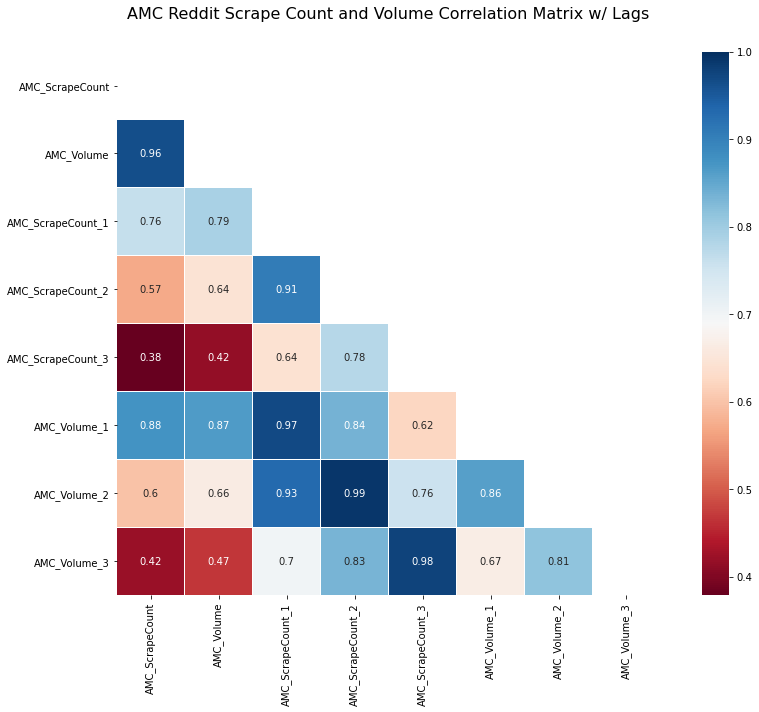

In [444]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'AMC Reddit Scrape Count and Volume Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

####

In [445]:
AMC_volatility = corr_volatility[['AMC_x','AMC_y']]
AMC_volatility = AMC_volatility.rename(columns = {'AMC_x':'AMC_ScrapeCount', 'AMC_y':'AMC_Volatility'})

NON_DER = ['Date',]
df = df_derived_by_shift(AMC_volatility, 3, NON_DER)

In [446]:
scipy.stats.pearsonr(corr_volatility['AMC_x'], corr_volatility['AMC_y'])
####

(0.46457962209760956, 0.01462987967477354)

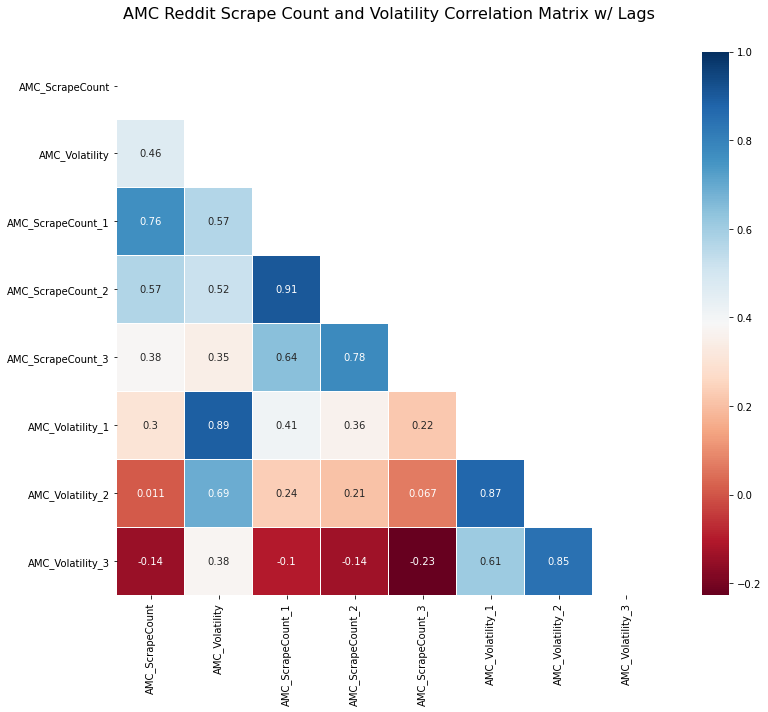

In [447]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'AMC Reddit Scrape Count and Volatility Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# AMD Analysis

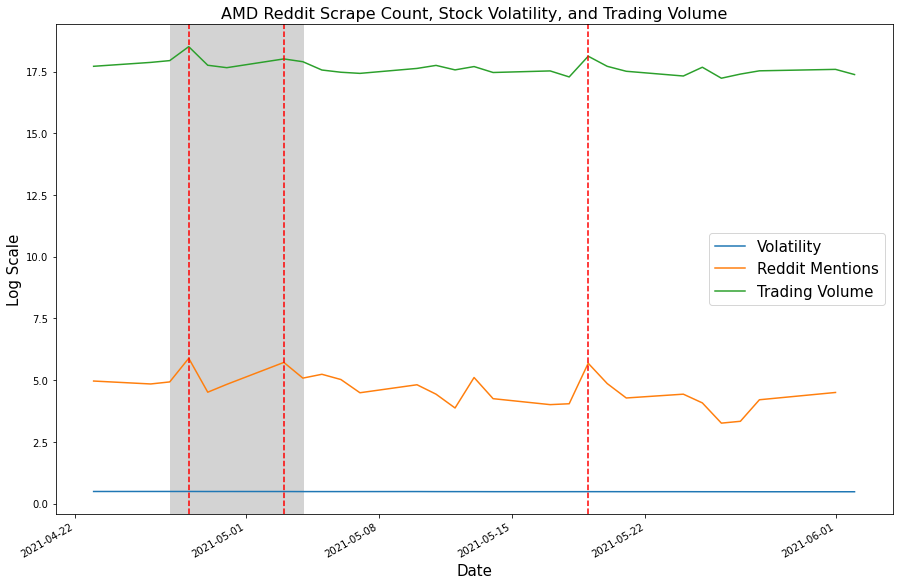

In [448]:
fig, ax = plt.subplots(figsize=(15,10))
volatility['AMD'].plot(x="Date", y="Amount", ax=ax, label='Volatility')
log_scrapes['AMD'].plot(x="Date", y="Amount", ax=ax, label='Reddit Mentions')
log_volume['AMD'].plot(x="Date", y="Amount", ax=ax, label='Trading Volume')
plt.title(u'AMD Reddit Scrape Count, Stock Volatility, and Trading Volume', size=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Log Scale', fontsize=15)
plt.axvspan(dt.datetime(2021, 4, 27), dt.datetime(2021, 5, 4), color='lightgray')
plt.axvline(dt.datetime(2021, 4, 28), color='r', linestyle='--')
plt.axvline(dt.datetime(2021, 5, 3), color='r', linestyle='--')
plt.axvline(dt.datetime(2021, 5, 19), color='r', linestyle='--')
plt.legend(prop={'size': 15}, loc='center right')
####

In [449]:
scipy.stats.pearsonr(corr_volume['AMD_x'], corr_volume['AMD_y'])
####

(0.849756597220868, 2.05214960148727e-08)

In [450]:
AMD_volume = corr_volume[['AMD_x','AMD_y']]
AMD_volume = AMD_volume.rename(columns = {'AMD_x':'AMD_ScrapeCount', 'AMD_y':'AMD_Volume'})
AMD_volume.head()

NON_DER = ['Date',]
df_new = df_derived_by_shift(AMD_volume, 3, NON_DER)
#df_new.head(10)

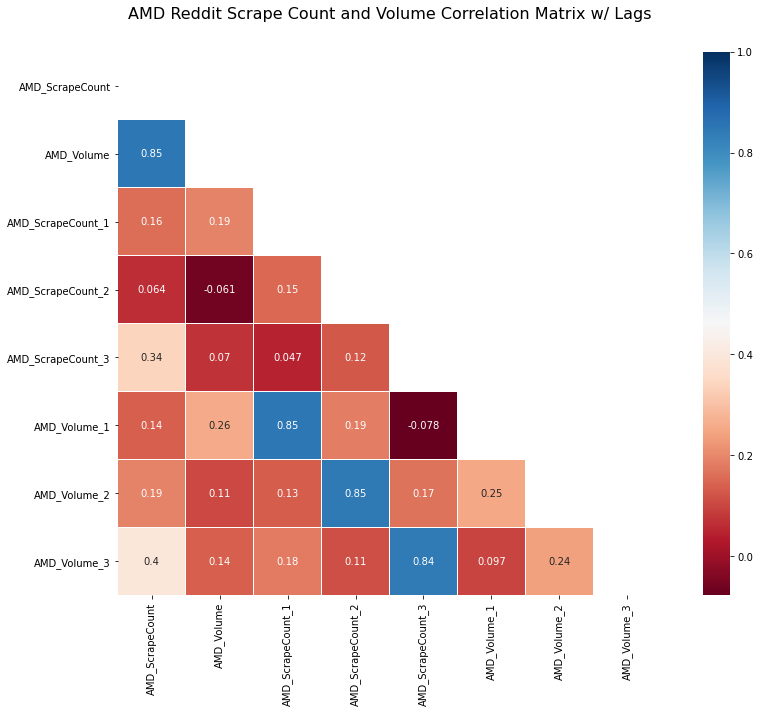

In [451]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'AMD Reddit Scrape Count and Volume Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [452]:
####
AMD_volatility = corr_volatility[['AMD_x','AMD_y']]
AMD_volatility = AMD_volatility.rename(columns = {'AMD_x':'AMD_ScrapeCount', 'AMD_y':'AMD_Volatility'})

NON_DER = ['Date',]
df = df_derived_by_shift(AMD_volatility, 3, NON_DER)

In [453]:
scipy.stats.pearsonr(corr_volatility['AMD_x'], corr_volatility['AMD_y'])
####

(0.5213579809878839, 0.005291049783396052)

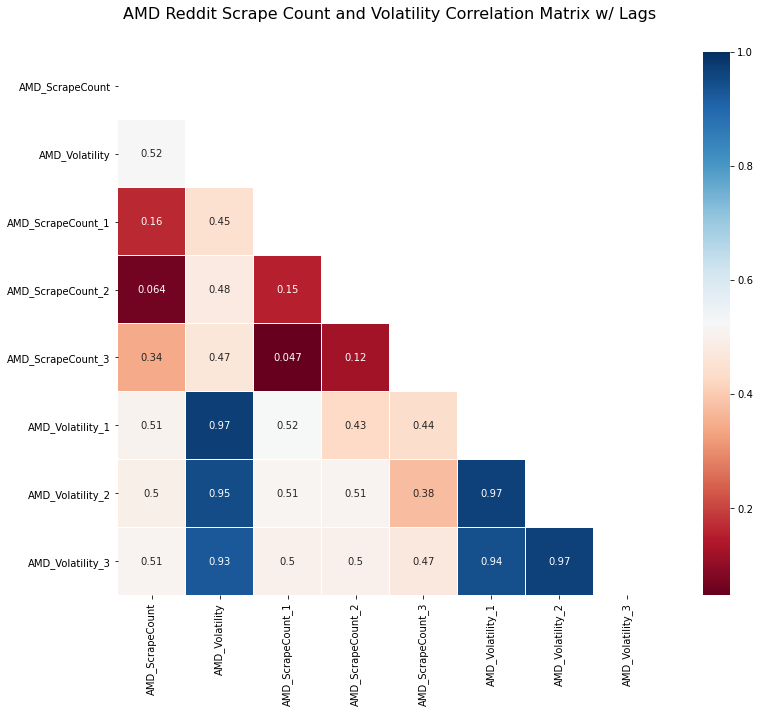

In [454]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'AMD Reddit Scrape Count and Volatility Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# PLTR Analysis

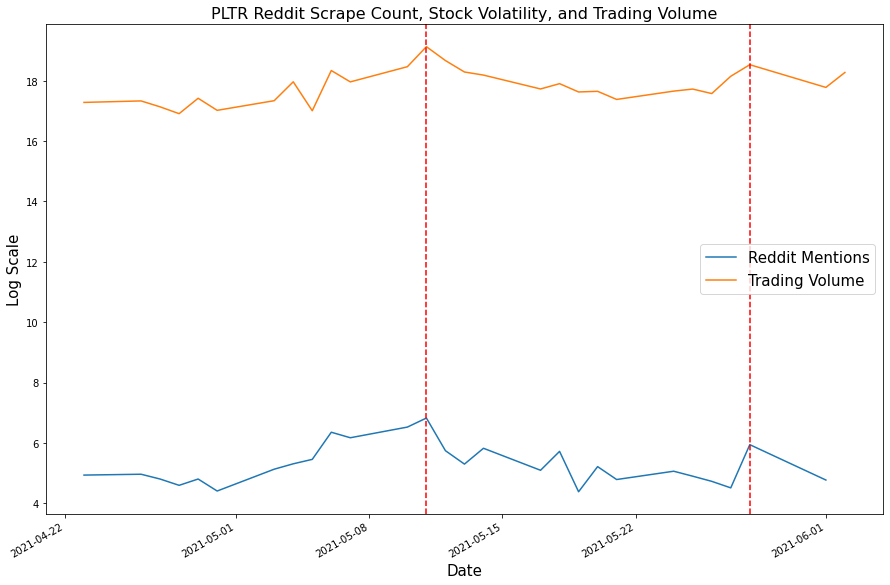

In [455]:
fig, ax = plt.subplots(figsize=(15,10))
#volatility['PLTR'].plot(x="Date", y="Amount", ax=ax, label='Volatility')
log_scrapes['PLTR'].plot(x="Date", y="Amount", ax=ax, label='Reddit Mentions')
log_volume['PLTR'].plot(x="Date", y="Amount", ax=ax, label='Trading Volume')
plt.title(u'PLTR Reddit Scrape Count, Stock Volatility, and Trading Volume', size=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Log Scale', fontsize=15)
plt.axvline(dt.datetime(2021, 5, 11), color='r', linestyle='--')
plt.axvline(dt.datetime(2021, 5, 28), color='r', linestyle='--')
plt.legend(prop={'size': 15}, loc='center right')
####

In [456]:
scipy.stats.pearsonr(corr_volume['PLTR_x'], corr_volume['PLTR_y'])
####

(0.8266158633963783, 1.0773343844738311e-07)

In [457]:
PLTR_volume = corr_volume[['PLTR_x','PLTR_y']]
PLTR_volume = PLTR_volume.rename(columns = {'PLTR_x':'PLTR_ScrapeCount', 'PLTR_y':'PLTR_Volume'})
PLTR_volume.head()

NON_DER = ['Date',]
df_new = df_derived_by_shift(PLTR_volume, 3, NON_DER)
#df_new.head(10)

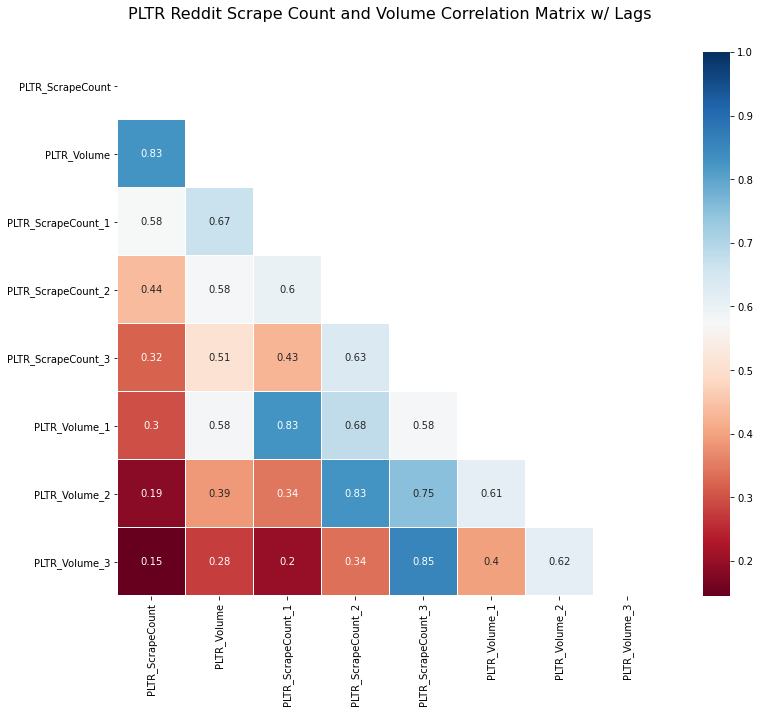

In [458]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'PLTR Reddit Scrape Count and Volume Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# TSLA Analysis

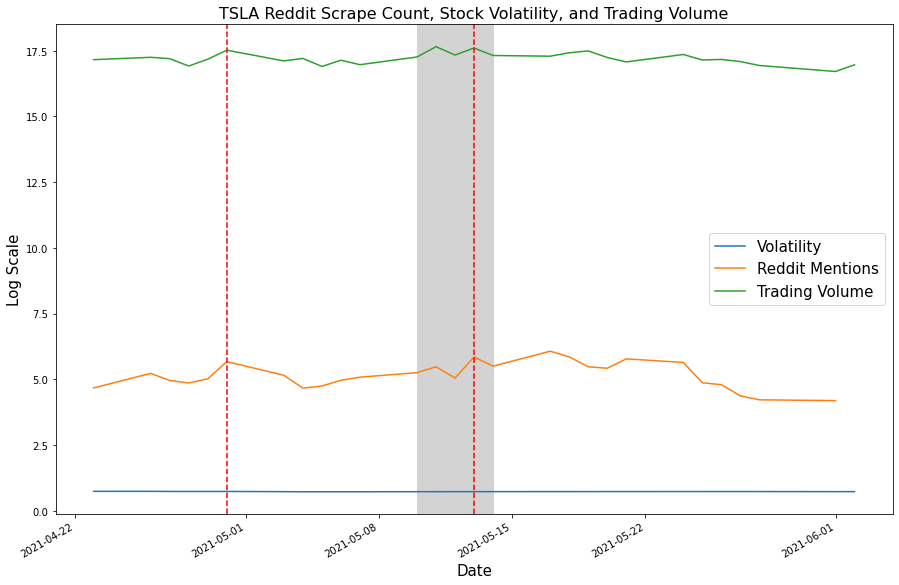

In [462]:
fig, ax = plt.subplots(figsize=(15,10))
volatility['TSLA'].plot(x="Date", y="Amount", ax=ax, label='Volatility')
log_scrapes['TSLA'].plot(x="Date", y="Amount", ax=ax, label='Reddit Mentions')
log_volume['TSLA'].plot(x="Date", y="Amount", ax=ax, label='Trading Volume')
plt.title(u'TSLA Reddit Scrape Count, Stock Volatility, and Trading Volume', size=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Log Scale', fontsize=15)
plt.axvline(dt.datetime(2021, 4, 30), color='r', linestyle='--')
plt.axvline(dt.datetime(2021, 5, 13), color='r', linestyle='--')
plt.axvspan(dt.datetime(2021, 5, 10), dt.datetime(2021, 5, 14), color='lightgray')
plt.legend(prop={'size': 15}, loc='center right')
####

In [463]:
scipy.stats.pearsonr(corr_volume['TSLA_x'], corr_volume['TSLA_y'])
####

(0.6446302496758655, 0.00028398349934212713)

In [464]:
TSLA_volume = corr_volume[['TSLA_x','TSLA_y']]
TSLA_volume = TSLA_volume.rename(columns = {'TSLA_x':'TSLA_ScrapeCount', 'TSLA_y':'TSLA_Volume'})
TSLA_volume.head()

NON_DER = ['Date',]
df_new = df_derived_by_shift(TSLA_volume, 3, NON_DER)
#df_new.head(10)

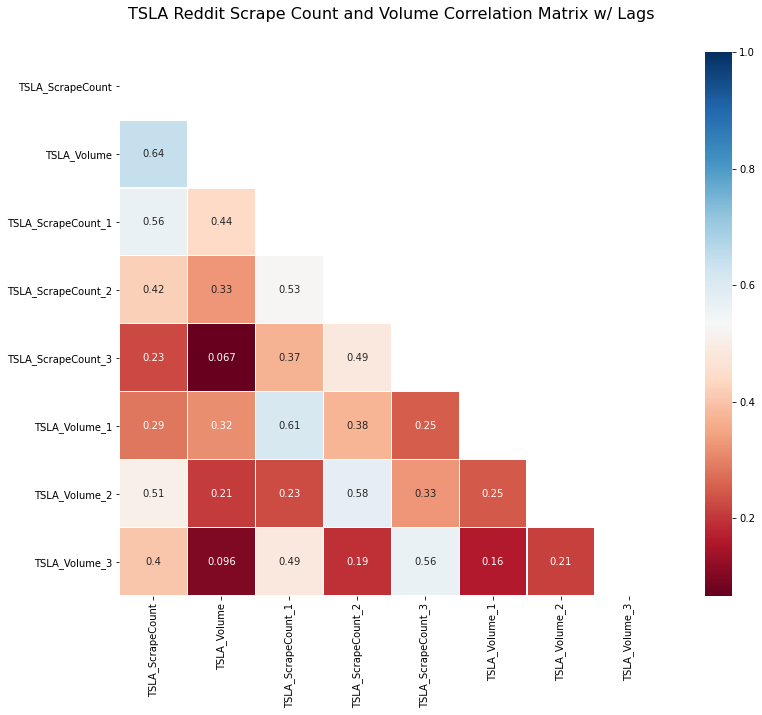

In [465]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'TSLA Reddit Scrape Count and Volume Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [466]:
####
TSLA_volatility = corr_volatility[['TSLA_x','TSLA_y']]
TSLA_volatility = TSLA_volatility.rename(columns = {'TSLA_x':'TSLA_ScrapeCount', 'TSLA_y':'TSLA_Volatility'})

NON_DER = ['Date',]
df = df_derived_by_shift(TSLA_volatility, 3, NON_DER)

In [467]:
scipy.stats.pearsonr(corr_volatility['TSLA_x'], corr_volatility['TSLA_y'])
####

(-0.026558925332216845, 0.8953822226896427)

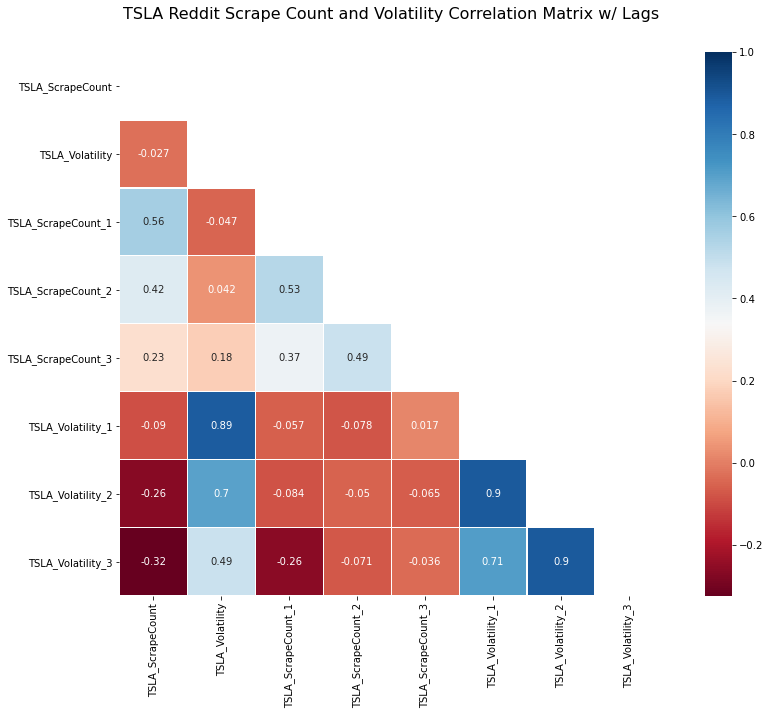

In [468]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'TSLA Reddit Scrape Count and Volatility Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# GME Analysis

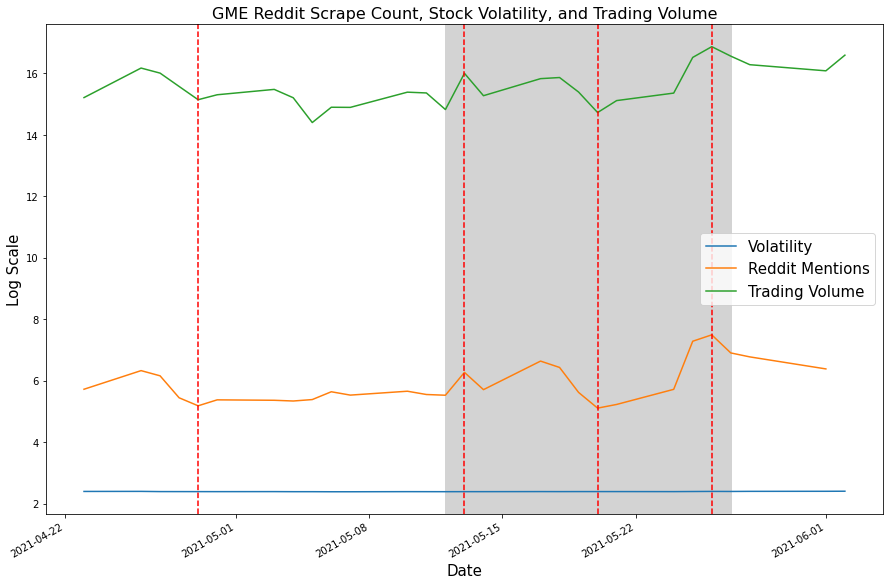

In [469]:
fig, ax = plt.subplots(figsize=(15,10))
volatility['GME'].plot(x="Date", y="Amount", ax=ax, label='Volatility')
log_scrapes['GME'].plot(x="Date", y="Amount", ax=ax, label='Reddit Mentions')
log_volume['GME'].plot(x="Date", y="Amount", ax=ax, label='Trading Volume')
plt.title(u'GME Reddit Scrape Count, Stock Volatility, and Trading Volume', size=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Log Scale', fontsize=15)
plt.axvspan(dt.datetime(2021, 5, 12), dt.datetime(2021, 5, 27), color='lightgray')
plt.axvline(dt.datetime(2021, 4, 29), color='r', linestyle='--')
plt.axvline(dt.datetime(2021, 5, 20), color='r', linestyle='--')
plt.axvline(dt.datetime(2021, 5, 13), color='r', linestyle='--')
plt.axvline(dt.datetime(2021, 5, 26), color='r', linestyle='--')
plt.legend(prop={'size': 15}, loc='center right')
####

In [470]:
scipy.stats.pearsonr(corr_volume['GME_x'], corr_volume['GME_y'])
####

(0.9450620199809113, 1.2059782292217273e-13)

In [471]:
GME_volume = corr_volume[['GME_x','GME_y']]
GME_volume = GME_volume.rename(columns = {'GME_x':'GME_ScrapeCount', 'GME_y':'GME_Volume'})
GME_volume.head()

NON_DER = ['Date',]
df_new = df_derived_by_shift(GME_volume, 3, NON_DER)
#df_new.head(10)

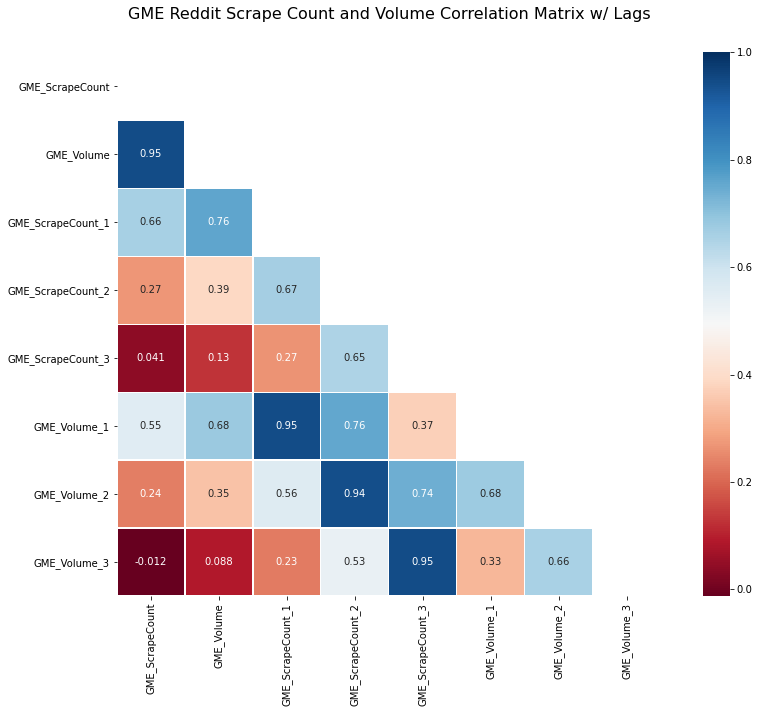

In [472]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'GME Reddit Scrape Count and Volume Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [473]:
####
GME_volatility = corr_volatility[['GME_x','GME_y']]
GME_volatility = GME_volatility.rename(columns = {'GME_x':'GME_ScrapeCount', 'GME_y':'GME_Volatility'})

NON_DER = ['Date',]
df = df_derived_by_shift(GME_volatility, 3, NON_DER)

In [474]:
scipy.stats.pearsonr(corr_volatility['GME_x'], corr_volatility['GME_y'])
####

(0.5702661731748776, 0.0018983009434564027)

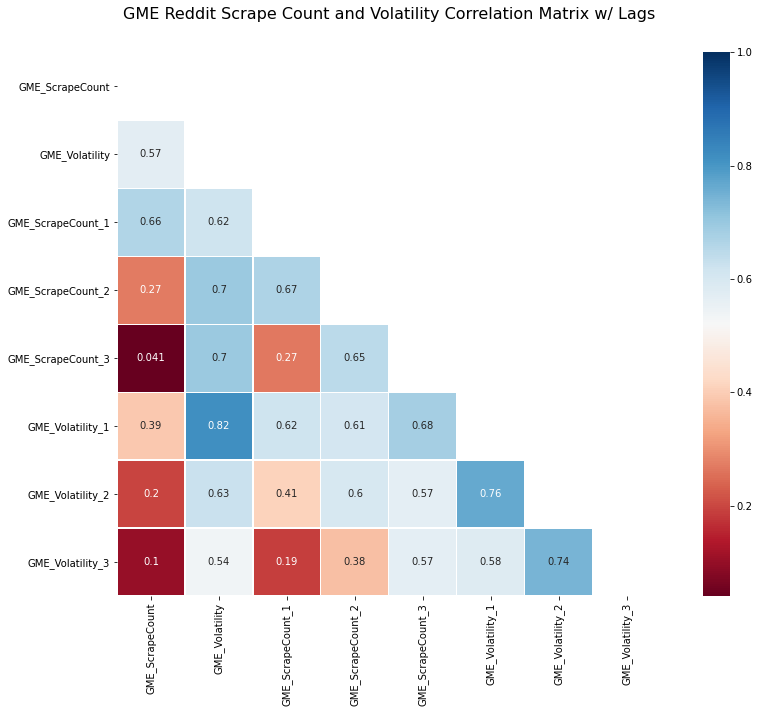

In [475]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'GME Reddit Scrape Count and Volatility Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# CE Analysis

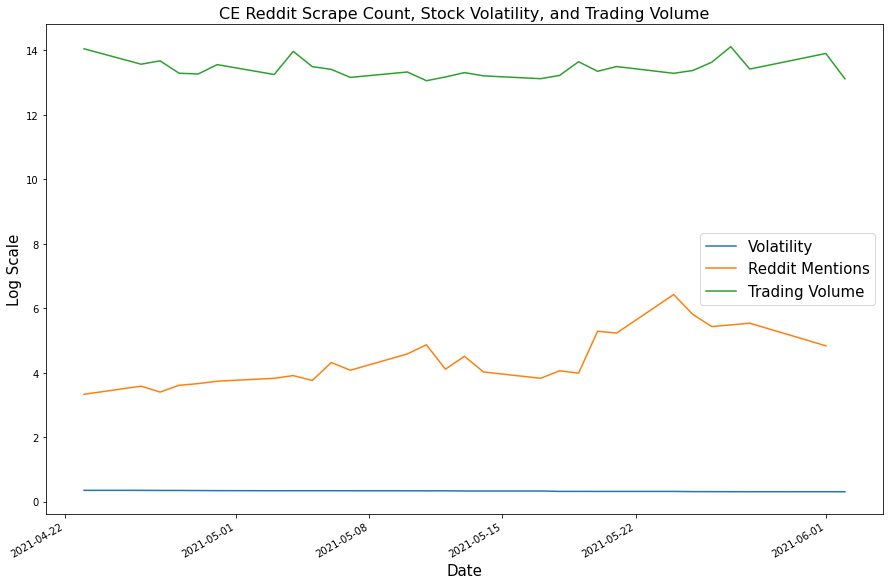

In [476]:
fig, ax = plt.subplots(figsize=(15,10))
volatility['CE'].plot(x="Date", y="Amount", ax=ax, label='Volatility')
log_scrapes['CE'].plot(x="Date", y="Amount", ax=ax, label='Reddit Mentions')
log_volume['CE'].plot(x="Date", y="Amount", ax=ax, label='Trading Volume')
plt.title(u'CE Reddit Scrape Count, Stock Volatility, and Trading Volume', size=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Log Scale', fontsize=15)
#plt.axvline(dt.datetime(2021, 5, 3), color='r', linestyle='--')
#plt.axvline(dt.datetime(2021, 5, 25), color='r', linestyle='--')
plt.legend(prop={'size': 15}, loc='center right')
####

In [477]:
scipy.stats.pearsonr(corr_volume['CE_x'], corr_volume['CE_y'])
####

(-0.01999077871326874, 0.9211624694426082)

In [478]:
CE_volume = corr_volume[['CE_x','CE_y']]
CE_volume = CE_volume.rename(columns = {'CE_x':'CE_ScrapeCount', 'CE_y':'CE_Volume'})
CE_volume.head()

NON_DER = ['Date',]
df_new = df_derived_by_shift(CE_volume, 3, NON_DER)
#df_new.head(10)

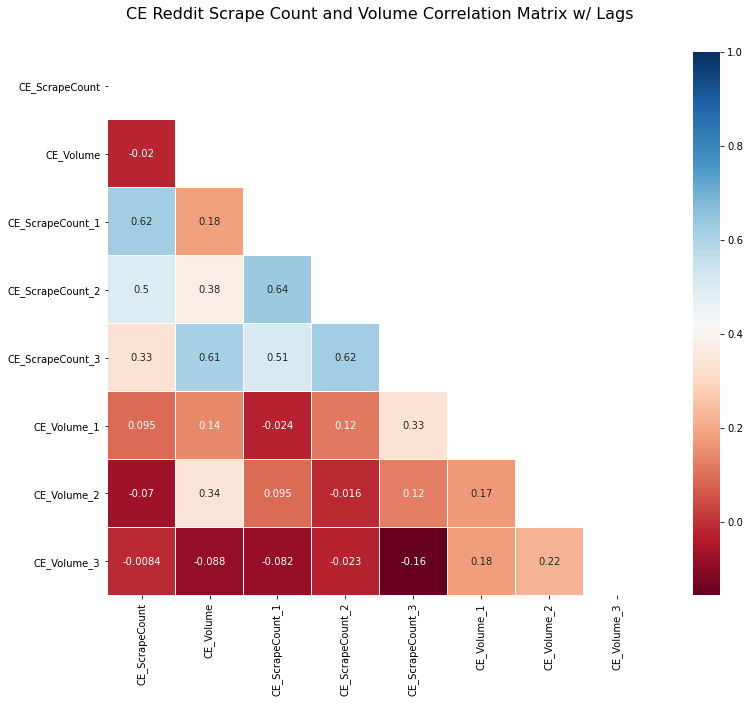

In [479]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'CE Reddit Scrape Count and Volume Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [480]:
####
CE_volatility = corr_volatility[['CE_x','CE_y']]
CE_volatility = CE_volatility.rename(columns = {'CE_x':'CE_ScrapeCount', 'CE_y':'CE_Volatility'})

NON_DER = ['Date',]
df = df_derived_by_shift(CE_volatility, 3, NON_DER)

In [481]:
scipy.stats.pearsonr(corr_volatility['CE_x'], corr_volatility['CE_y'])
####

(-0.6405666541727469, 0.00031910314141290547)

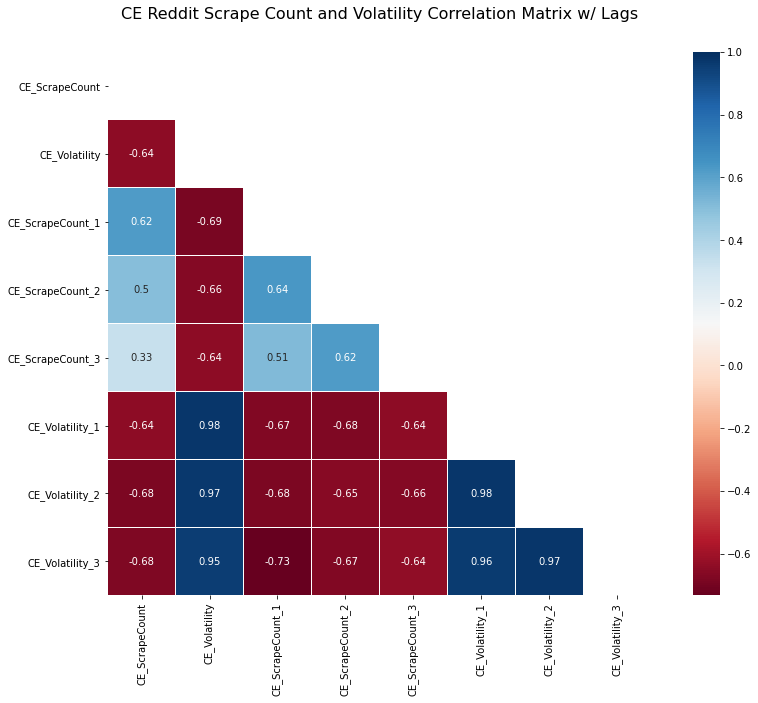

In [482]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'CE Reddit Scrape Count and Volatility Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# AN Analysis

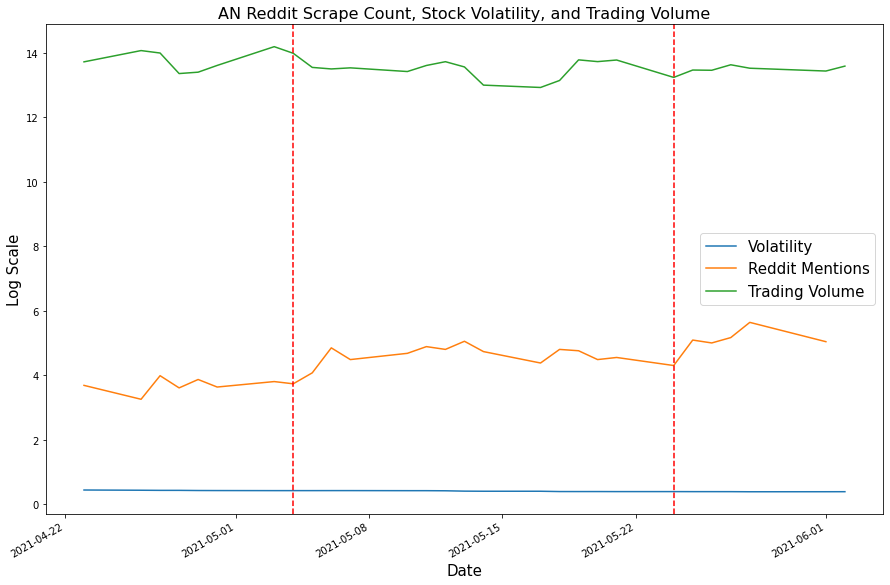

In [483]:
fig, ax = plt.subplots(figsize=(15,10))
volatility['AN'].plot(x="Date", y="Amount", ax=ax, label='Volatility')
log_scrapes['AN'].plot(x="Date", y="Amount", ax=ax, label='Reddit Mentions')
log_volume['AN'].plot(x="Date", y="Amount", ax=ax, label='Trading Volume')
plt.title(u'AN Reddit Scrape Count, Stock Volatility, and Trading Volume', size=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Log Scale', fontsize=15)
plt.axvline(dt.datetime(2021, 5, 4), color='r', linestyle='--')
plt.axvline(dt.datetime(2021, 5, 24), color='r', linestyle='--')
plt.legend(prop={'size': 15}, loc='center right')
####

In [484]:
scipy.stats.pearsonr(corr_volume['AN_x'], corr_volume['AN_y'])
####

(-0.33495849523077104, 0.08765971027868465)

In [485]:
AN_volume = corr_volume[['AN_x','AN_y']]
AN_volume = AN_volume.rename(columns = {'AN_x':'AN_ScrapeCount', 'AN_y':'AN_Volume'})
AN_volume.head()

NON_DER = ['Date',]
df_new = df_derived_by_shift(AN_volume, 3, NON_DER)
#df_new.head(10)

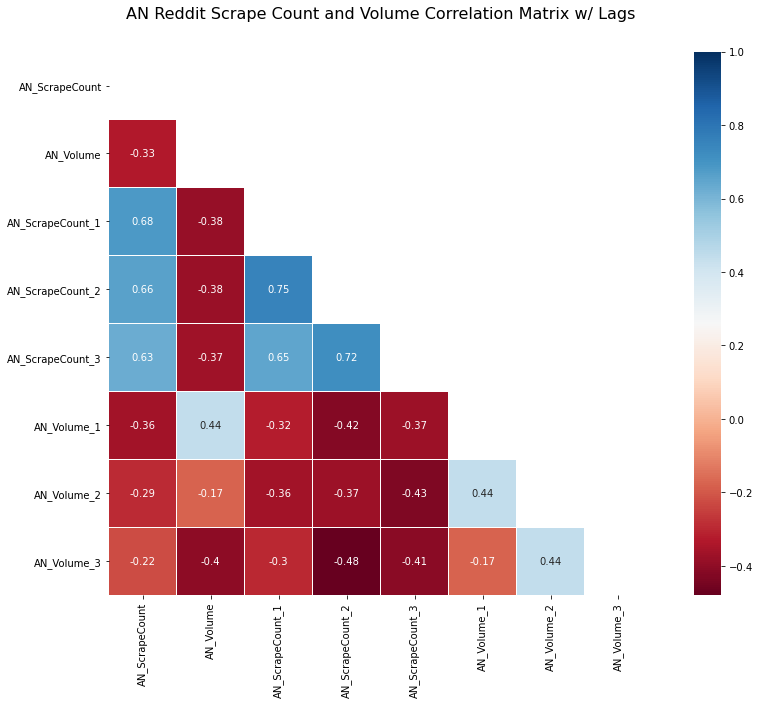

In [486]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'AN Reddit Scrape Count and Volume Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [487]:
####
AN_volatility = corr_volatility[['AN_x','AN_y']]
AN_volatility = AN_volatility.rename(columns = {'AN_x':'AN_ScrapeCount', 'AN_y':'AN_Volatility'})

NON_DER = ['Date',]
df = df_derived_by_shift(AN_volatility, 3, NON_DER)

In [488]:
scipy.stats.pearsonr(corr_volatility['AN_x'], corr_volatility['AN_y'])
####

(-0.6939500623849598, 5.9567510124217384e-05)

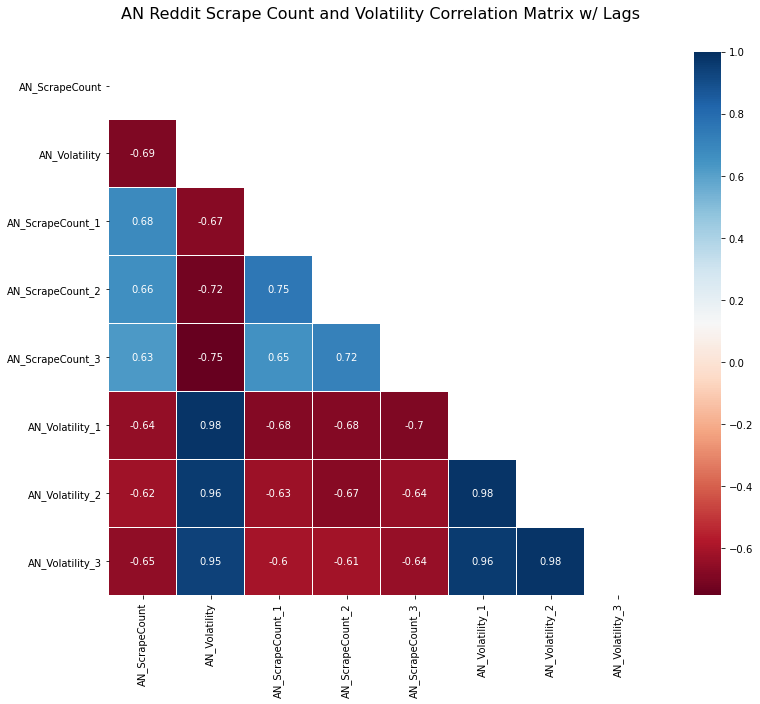

In [489]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'AN Reddit Scrape Count and Volatility Correlation Matrix w/ Lags', y=1.05, size=16)

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)